# Probability Density Estimation

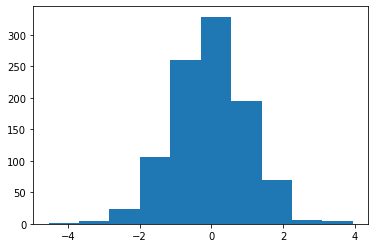

In [4]:
from matplotlib import pyplot
from numpy.random import normal

sample = normal(size=1000)

pyplot.hist(sample, bins=10)
pyplot.show()

Mean=%50.130, Standard Deviation=%5.036 


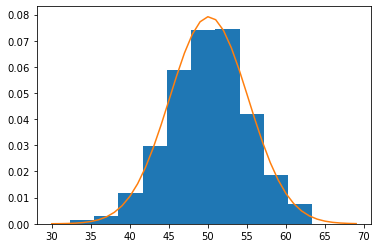

In [9]:
from matplotlib import pyplot
from numpy.random import normal
from numpy import mean
from numpy import std
from scipy.stats import norm 

sample = normal(loc=50, scale=5, size=1000)
sample_mean = mean(sample)
sample_std = std(sample)
print('Mean=%{0:.3f}, Standard Deviation=%{1:.3f} '.format(sample_mean, sample_std))

dist = norm(sample_mean, sample_std)

values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]

pyplot.hist(sample, bins=10, density=True)
pyplot.plot(values, probabilities)
pyplot.show()


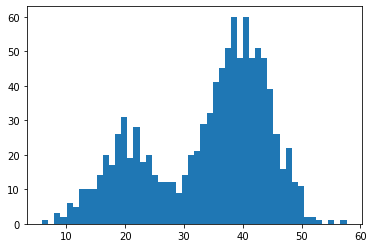

In [2]:
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack

sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

pyplot.hist(sample, bins=50)
pyplot.show()

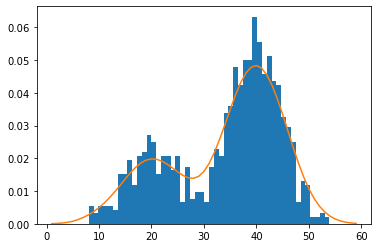

In [6]:
from matplotlib import pyplot 
from numpy.random import normal
from numpy import hstack
from numpy import asarray
from numpy import exp
from sklearn.neighbors import KernelDensity

## create our two histograms of simulated raw data then merge into one
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

# generate a density "autonomously" to compare against the merged histogram
# plug in the sample data to generate the PDF probs
model = KernelDensity(bandwidth=3, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)

# convert the probs into a probability scale between 0 and 1
values = asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = exp(probabilities)

# compare the autonomously generated PDF against the histogram (raw data) 
# to see how well it fits 
pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values[:], probabilities)
pyplot.show()

